Filename: nH1.0e+00_lam1.14um_theobs0.00_Ldnu_xcentr.txt, lam: 1.14, theobs: 0.0
10292728.3 41170913200.0 200.0
Filename: nH1.0e+00_lam1.39um_theobs0.00_Ldnu_xcentr.txt, lam: 1.39, theobs: 0.0
10292728.3 41170913200.0 200.0
Filename: nH1.0e+00_lam1.54um_theobs0.00_Ldnu_xcentr.txt, lam: 1.54, theobs: 0.0
10292728.3 41170913200.0 200.0
5.133333333333333e+23


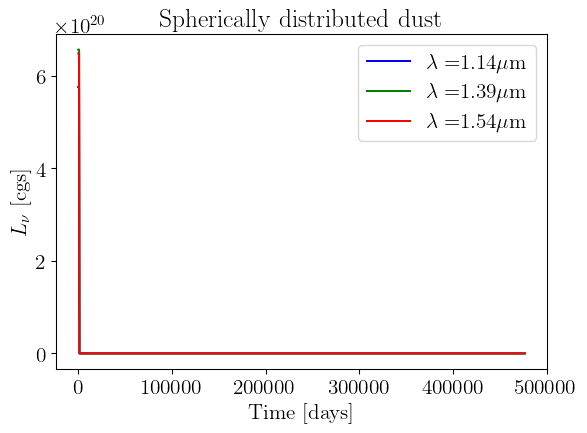

'\nif __name__ == "__main__":\n    if len(sys.argv) != 2:\n        print("Usage: python3 script_file.py data_file.txt")\n    else:\n        filename = sys.argv[1]\n        main(filename)\n'

<Figure size 614.4x460.8 with 0 Axes>

In [36]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
import sys
import re

CUSTOM_PLOT_STYLE = {
    "text.usetex": True,

    "font.family": "serif",
    "font.size": 16,

    # Set some default sizes, so we don't need to include them in each call
    "lines.markersize": 1.5,
    "lines.linewidth": 1.5,
    # "errorbar.capsize": 3,

    # Set savefig to use bbox_inches="tight" by default
    "savefig.bbox": "tight",
    "savefig.facecolor": "none",
    "savefig.dpi": 300,

    # Higher DPI for sharper inline images
    "figure.dpi": 96
}

matplotlib.rcdefaults()
matplotlib.rcParams.update(CUSTOM_PLOT_STYLE)

# Define the regular expression pattern
pattern = r'nH[0-9\.e\+\-]+_lam([0-9\.e\+\-]+)um_theobs([0-9\.e\+\-]+)_Ldnu_xcentr\.txt'

filenames = ["nH1.0e+00_lam1.14um_theobs0.00_Ldnu_xcentr.txt",
             "nH1.0e+00_lam1.39um_theobs0.00_Ldnu_xcentr.txt",
             "nH1.0e+00_lam1.54um_theobs0.00_Ldnu_xcentr.txt"]

colors = ["blue", "green", "red"]

# Function to extract values from filename
def extract_values(filename):
    match = re.match(pattern, filename)
    if match:
        lam = float(match.group(1))
        theobs = float(match.group(2))
        return lam, theobs
    else:
        return None, None

# Initialize the plot
fig, ax = plt.subplots()

ax.set_xlabel('Time [days]')
ax.set_ylabel('$L_{\\nu}$ [cgs]')

for i in range(len(filenames)):
    filename = filenames[i]
    if filename.endswith('.txt'):
        lam, theobs = extract_values(filename)
        if lam is not None and theobs is not None:
            print(f'Filename: {filename}, lam: {lam}, theobs: {theobs}')
    
    with open(filename, 'r') as file:
        first_line = file.readline()
        first_row_data = first_line.split()[3:]
    
    # Assign the three floats to variables
    tobsmin, tobsmax, Ntobs = map(float, first_row_data)
    #tobsmax = tobsmax-tobsmin
    print(tobsmin, tobsmax, Ntobs)
    # Load the data from the text file
    data = np.genfromtxt(filename, dtype=float, skip_header=2, filling_values=np.nan)
    
    Ldnu_cgs = data[0]
    xcentr_pc = data[1]
    
    log_tobsmin = np.log10(tobsmin)
    log_tobsmax = np.log10(tobsmax)
    
    # Create the logarithmic space with normalized values
    tobs = np.logspace(log_tobsmin, log_tobsmax, num=int(Ntobs), base=10)
    tobs = tobs/(60*60*24)

    ax.plot(tobs, Ldnu_cgs, color=colors[i], label="$\\lambda = $"+str(lam)+"$\\mu$m")

L_cutoff = 10**38/(3*10**8*10**6/lam)

plt.title("Spherically distributed dust")
plt.legend()
#plt.xlim(left=0, right=50000)
print(L_cutoff)
#plt.ylim(bottom=L_cutoff)
fig.tight_layout()  # Ensure the plot layout is tidy
plt.show()   

plotfile="plot_l"+str(lam)+"theobs"+str(theobs)+".png"
plt.savefig("newplot.pdf")

"""
if __name__ == "__main__":
    if len(sys.argv) != 2:
        print("Usage: python3 script_file.py data_file.txt")
    else:
        filename = sys.argv[1]
        main(filename)
"""
